In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import folium
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# crimeseoul.csv 파일을 이용
seoulDF = pd.read_csv('data/crime_in_Seoul.csv',
         encoding='euc-kr', thousands=',', index_col='관서명')
seoulDF

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
관서명,,,,,,,,,,
중부서,2,2,3,2,105,65,1395,477,1355,1170
종로서,3,3,6,5,115,98,1070,413,1278,1070
남대문서,1,0,6,4,65,46,1153,382,869,794
서대문서,2,2,5,4,154,124,1812,738,2056,1711
혜화서,3,2,5,4,96,63,1114,424,1015,861
용산서,5,5,14,14,194,173,1557,587,2050,1704
성북서,2,2,2,1,86,71,953,409,1194,1015
동대문서,5,5,13,13,173,146,1981,814,2548,2227
마포서,8,8,14,10,294,247,2555,813,2983,2519


01. 살인발생이 가장높은 관서명, 살인발생,살인검거를 출력하시요

In [6]:
seoulDF[['살인 발생', '살인 검거']].nlargest(1,'살인 발생', keep='all')

,살인 발생,살인 검거
관서명,,
영등포서,14,12


2. 관서별 절도발생,절도검거에 대한 바차트를 그리시오.

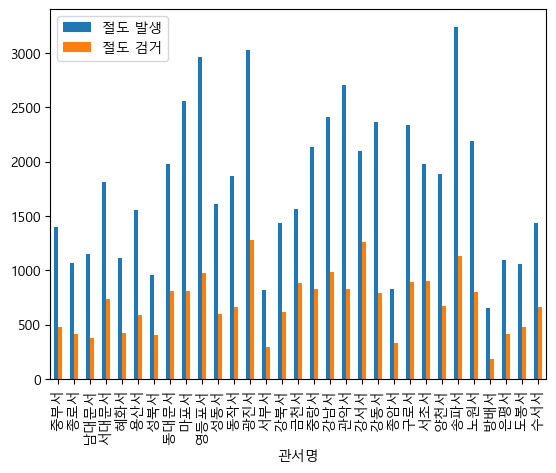

In [7]:
seoulDF.plot(kind='bar', y=['절도 발생', '절도 검거'])
plt.show()

3. 절도검거율 컬럼을 추가 하시요. 

In [9]:
#seoulDF['절도검거율']=(seoulDF['절도 검거']/(seoulDF['절도 발생'])*100).round(2)
seoulDF.insert(8,'절도검거율1', (seoulDF['절도 검거']/(seoulDF['절도 발생'])*100).round(2) )
seoulDF

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,절도검거율1,폭력 발생,폭력 검거,절도검거율
관서명,,,,,,,,,,,,
중부서,2,2,3,2,105,65,1395,477,34.19,1355,1170,34.19
종로서,3,3,6,5,115,98,1070,413,38.60,1278,1070,38.60
남대문서,1,0,6,4,65,46,1153,382,33.13,869,794,33.13
서대문서,2,2,5,4,154,124,1812,738,40.73,2056,1711,40.73
혜화서,3,2,5,4,96,63,1114,424,38.06,1015,861,38.06
용산서,5,5,14,14,194,173,1557,587,37.70,2050,1704,37.70
성북서,2,2,2,1,86,71,953,409,42.92,1194,1015,42.92
동대문서,5,5,13,13,173,146,1981,814,41.09,2548,2227,41.09
마포서,8,8,14,10,294,247,2555,813,31.82,2983,2519,31.82
